# Title

#### Predictive Modelling of Play Time in Minecraft Servers

# Introduction
A research group is collecting data about how people play video games. They have set up a MineCraft server, and players’ actions are recorded as they navigate through the world. For running this project, they need to target their recruitment efforts, and make sure they have enough resources to handle the number of players they attract. The purpose of our project is to provide an idea for this and use data analysis to prove whether this idea can effectively assist their recruitment.

Understanding how different player characteristics relate to gameplay experience is essential for designing engaging game environments and tailoring content to different player groups. In behavioral game analytics, experience level is often used as a proxy for proficiency, engagement, or familiarity with game mechanics. Identifying factors that correlate with experience level can help inform game balancing, player retention strategies, and the design of personalized player experiences.

In this project, we analyze player information and gameplay behaviour using two data sources: a player dataset containing demographic variables and a session dataset containing gameplay durations. Our research question is:

**Can a player's age and play time be used to predict whether or not they are subscribed to a game-related newsletter.**

To answer this question, we examine whether a player’s gender and experience level are related to their average play time . By summarizing and visualizing these variables, we aim to identify patterns in how experienece and gender differ across experience groups.

In [50]:
# Load the required libraries
library(tidyverse)
library(tidymodels)

# Read the Data
players <- read_csv("https://raw.githubusercontent.com/achan919/dsci-final-project/refs/heads/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


# Data Description
The file `players.csv` was collected by a research group in Computer Science at UBC to help us complete our project. It contains 196 players’ information and 7 variables columns:

| Variable     |Data Type | Description |
|--------------|----------|-------------|
| experience   | chr |Level of experience (Pro, Veteran, Amateur, Regular, Beginner) |
| subscribe    | lgl |Whether the player subscribed to the newsletter |
| hashedEmail  | chr | Hashed/hidden email of the player |
| played_hours | dbl |Total hours played (mean = 5.846) |
| name         | chr |Player's first name |
| gender       | chr |Gender (Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirited, Other) |
| Age          | dbl |Player age in years (mean = 21.14) |

# Methods & Results

### **1. Wrangling + Cleaning**

The players table contains demographic and experience-related attributes describing each user. Variables such as experience and gender are categorical. To ensure proper treatment in grouping, plotting, or modeling, these fields were converted into factor types using **as_factor()**.

In [118]:
# Tidy the players data set
players_tidy <- players |>
select(Age, played_hours, subscribe) |>
  mutate(subscribe = factor(subscribe,  
                            levels = c(FALSE, TRUE), 
                            labels = c("Not Subscribed", "Subscribed"))) |>
 filter(!is.na(Age))
head(players_tidy)

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,Subscribed
17,3.8,Subscribed
17,0.0,Not Subscribed
21,0.7,Subscribed
21,0.1,Subscribed
17,0.0,Subscribed


For the player data set, we also need to compute the mean of each numeric variable. This helps identify and compare the overall trends in player attributes such as age and playtime and give us a sense of what the data looks like before doing more analysis.

### **2. Exploratory Data Analysis**

In [175]:
# Summary of player dataset
players_summary <- summary(players_tidy)
players_summary

# Summarize player counts by age and extract the top 10 most frequent ages
top10_age_distribution <- players_tidy |>
  group_by(Age) |>
    summarize(
        count = n()) |>
  slice_max(count , n = 10)
top10_age_distribution

players_top10 <- players_tidy |>
  semi_join(top10_age_distribution, by = "Age")

      Age         played_hours              subscribe  
 Min.   : 9.00   Min.   :  0.000   Not Subscribed: 52  
 1st Qu.:17.00   1st Qu.:  0.000   Subscribed    :142  
 Median :19.00   Median :  0.100                       
 Mean   :21.14   Mean   :  5.905                       
 3rd Qu.:22.75   3rd Qu.:  0.600                       
 Max.   :58.00   Max.   :223.100                       

Age,count
<dbl>,<int>
17,73
21,18
22,15
20,14
23,13
24,10
18,7
19,7
26,4


### **3. Visualizations**

#### Visualization 1: Age Distribution

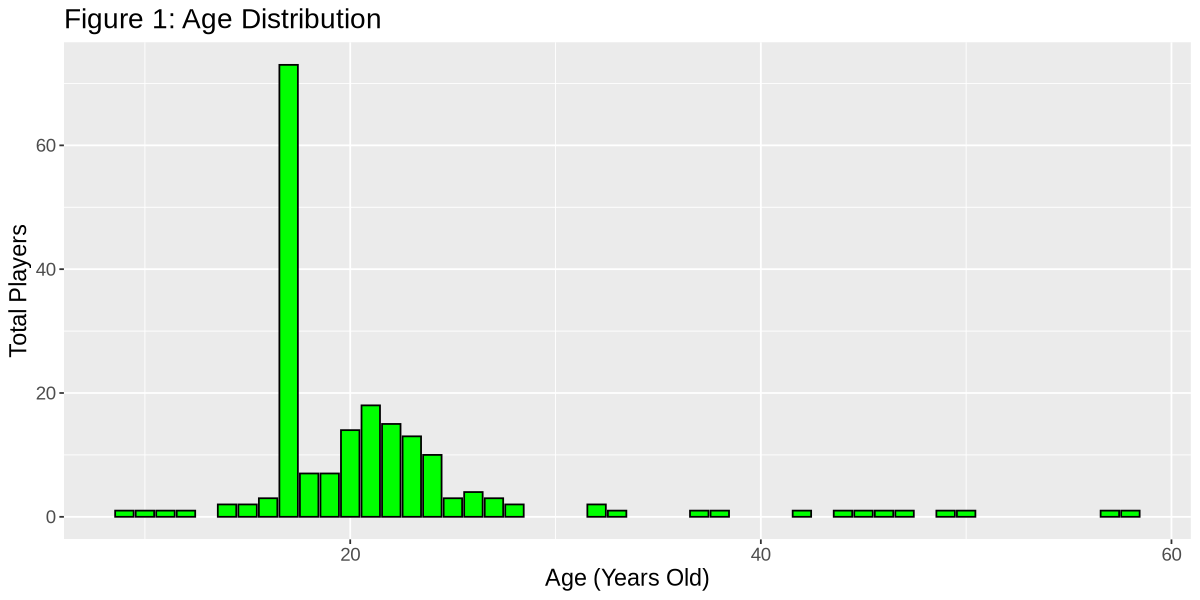

In [176]:
# visualization of age distribution
age_distribution_plot <- players_tidy |>
  ggplot(aes(x = Age)) +
  geom_bar(fill = "green", color = "black") +
  labs(title = "Figure 1: Age Distribution",
       x = "Age (Years Old)",
       y = "Total Players") +
  theme(text = element_text(size = 14))
age_distribution_plot

 #### Visualization 2: Played Hours Distribution

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


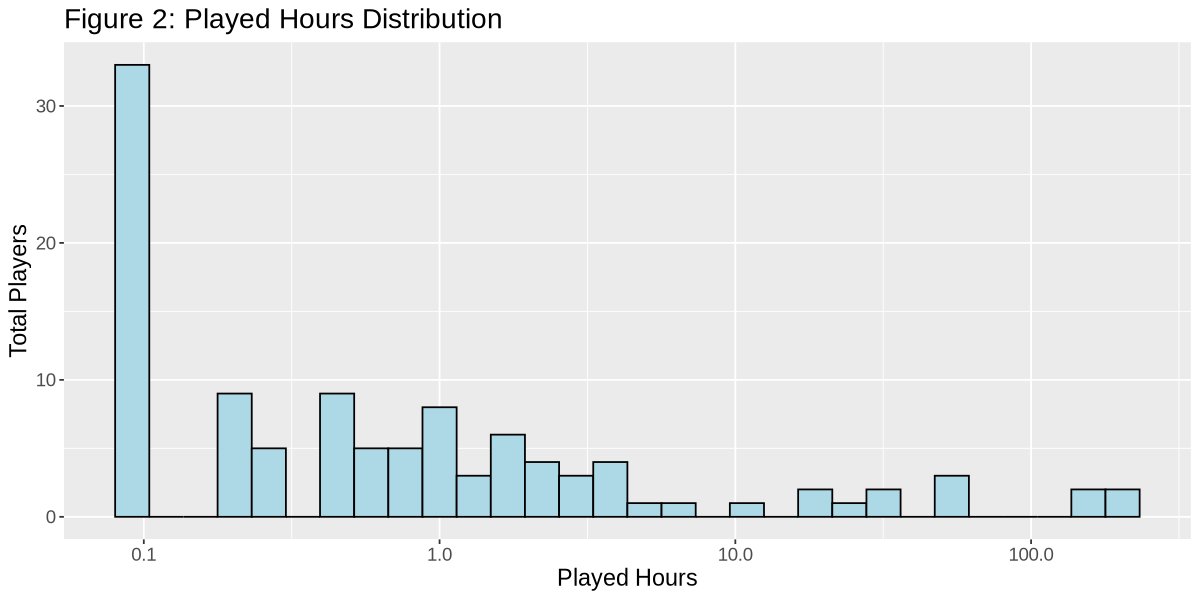

In [182]:
options(repr.plot.width = 10, repr.plot.height = 5) 

played_hours_distribution_plot <- ggplot(players_tidy, aes(x = played_hours)) +
    geom_histogram(fill = "lightblue", color = "black") +
    labs(title = "Figure 2: Played Hours Distribution",
         x = "Played Hours",
         y = "Total Players") +
  scale_x_log10() +
  theme(text = element_text(size = 14))
played_hours_distribution_plot

 #### Visualization 3: Subscription Distribution

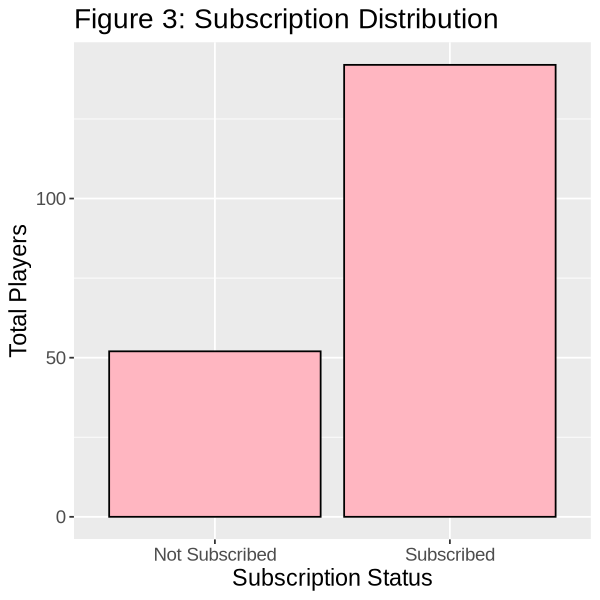

In [183]:
options(repr.plot.width = 5, repr.plot.height = 5) 

subscription_distribution_plot <- players_tidy |>
  ggplot(aes(x = subscribe)) +
  geom_bar(fill = "lightpink", color = "black") +
  labs(title = "Figure 3: Subscription Distribution",
       x = "Subscription Status",
       y = "Total Players") +
  theme(text = element_text(size = 14))
subscription_distribution_plot

#### Visualization 4: A Player's Play Time By Subscription

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


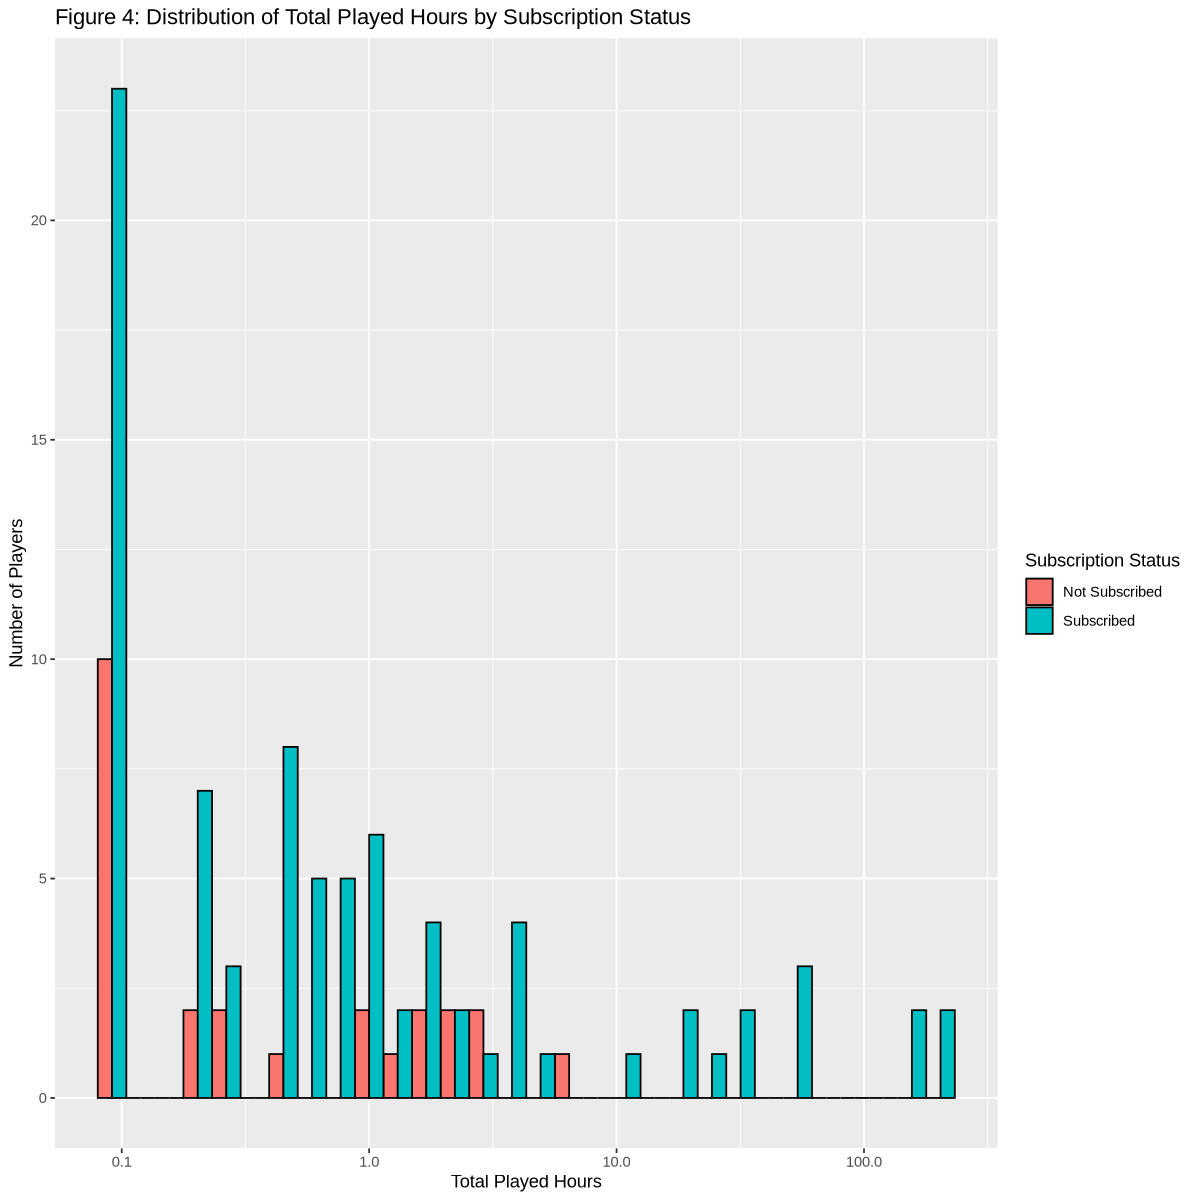

In [184]:
options (repr.plot.width = 10, repr.plot.height = 10)

total_played_hours_plot <- ggplot(players_tidy, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(color = "black", position = "dodge") +
  scale_x_log10() +
  labs(
    title = "Figure 4: Distribution of Total Played Hours by Subscription Status",
    x = "Total Played Hours",
    y = "Number of Players", 
    fill = "Subscription Status"
  )
total_played_hours_plot

#### Visualization 5: A Player's Age by Subscription

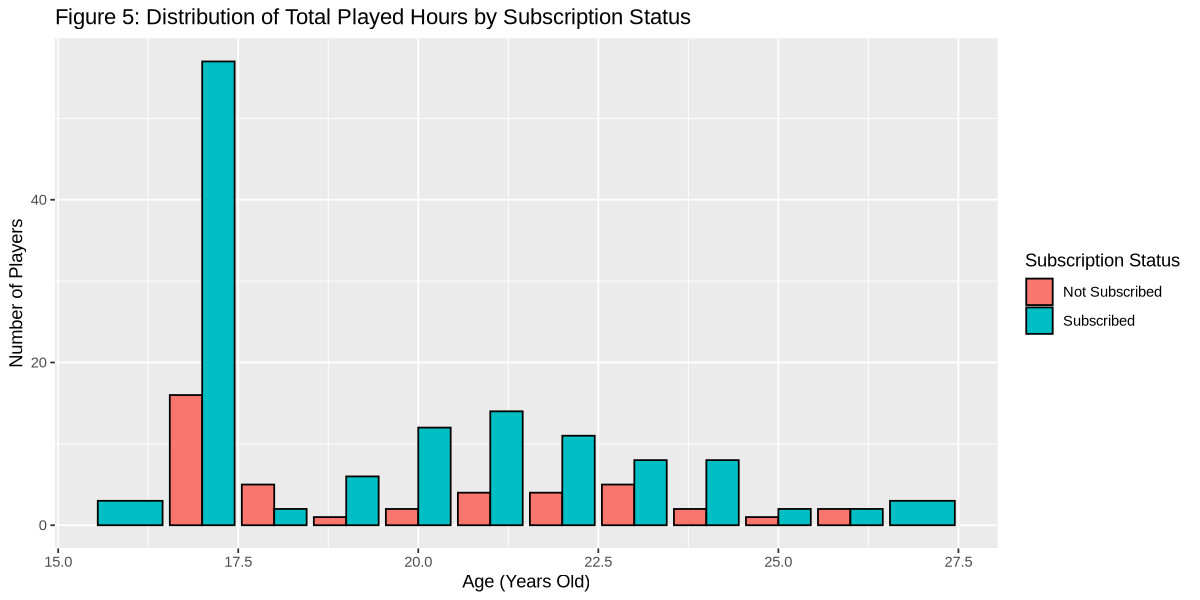

In [187]:
options (repr.plot.width = 10, repr.plot.height = 5)

# Subscription status vs Age
age_plot <- ggplot(players_top10, aes(x = Age, fill = subscribe)) +
  geom_bar(color = "black", position = "dodge") +
  labs(
    title = "Figure 5: Distribution of Total Played Hours by Subscription Status",
    x = "Age (Years Old)",
    y = "Number of Players",
    fill = "Subscription Status"
  )
age_plot

# Discussion

Our analysis examined whether a player’s gender and total play time relate to their experience level. From the summary statistics and bar plot visualizations, we can see several patterns: 

The first visualization and second visualizations show distribution between gender and experience.

The third visualization shows that an average regular player has more play time than the rest, while an average veteran has the least.

The fourth visualization shows that an average non-binary player has more play time than the rest, while an an average two-spirited player has the least.

The final visualization shows that no single gender dominates gaming across all experience levels. Males lead in play time at the Pro and Beginner levels, while Agender, Female, and Non-binary individuals top the Veteran, Amateur, and Regular tiers respectively. This suggests that gaming engagement varies widely by gender and experience, with underrepresented identities showing strong participation in specific tiers.

Overall, our findings show that higher experience levels does not neccesarily associate with higher play time. On the contrary, regular players contribute the most amount of play time. Additionally, the gender distributions (Visualization 5) indicate that genders are not evenly represented across experience levels. For example, although non-binary players are not the majority of players, on average they spend more time playing than others. More detailed modeling would be required to investigate the relationship between gender and participation patterns more precisely.

# References